# Comparison of Individual, Bagging and Boosting Algorithms

In [1]:
#!pip install xgboost -q

In [9]:
# import Libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from xgboost import XGBClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
from sklearn.preprocessing import LabelEncoder
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier

# Working on Iris Dataset

In [10]:
# import the data
df = sns.load_dataset('iris')
df.head()

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa


<Axes: xlabel='sepal_length', ylabel='sepal_width'>

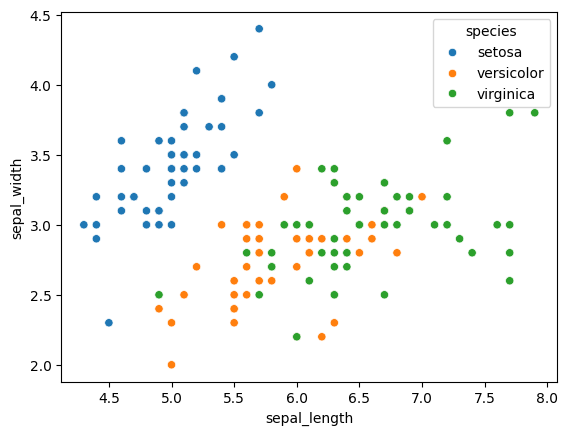

In [11]:
# Plot the data as scatterplot
sns.scatterplot(data=df, x='sepal_length', y='sepal_width', hue='species')

In [23]:
df.shape

(150, 5)

In [17]:
# Split the data into X and y
X = df.drop('species', axis=1)
y = df['species']

# Encode the labels
le = LabelEncoder()
y = le.fit_transform(y)

# Split the data into train and test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [18]:
%%time
# Train the decision tree model
dt = DecisionTreeClassifier()
dt.fit(X_train, y_train)

# Predict the test data
y_pred = dt.predict(X_test)

print('Accuracy score:', accuracy_score(y_test, y_pred))
print('Precision score:', precision_score(y_test, y_pred, average='macro'))
print('Recall score:', recall_score(y_test, y_pred, average='macro'))
print('F1 score:', f1_score(y_test, y_pred, average='macro'))

Accuracy score: 1.0
Precision score: 1.0
Recall score: 1.0
F1 score: 1.0
CPU times: total: 31.2 ms
Wall time: 24 ms


In [19]:
%%time
# Train the random forest model
rf = RandomForestClassifier()
rf.fit(X_train, y_train)

# Predict the test data
y_pred = rf.predict(X_test)

print('Accuracy score:', accuracy_score(y_test, y_pred))
print('Precision score:', precision_score(y_test, y_pred, average='macro'))
print('Recall score:', recall_score(y_test, y_pred, average='macro'))
print('F1 score:', f1_score(y_test, y_pred, average='macro'))

Accuracy score: 1.0
Precision score: 1.0
Recall score: 1.0
F1 score: 1.0
CPU times: total: 391 ms
Wall time: 546 ms


In [20]:
%%time
# Train the XGBoost model
xgb = XGBClassifier()
xgb.fit(X_train, y_train)

# Predict the test data
y_pred = xgb.predict(X_test)

print('Accuracy score:', accuracy_score(y_test, y_pred))
print('Precision score:', precision_score(y_test, y_pred, average='macro'))
print('Recall score:', recall_score(y_test, y_pred, average='macro'))
print('F1 score:', f1_score(y_test, y_pred, average='macro'))

Accuracy score: 1.0
Precision score: 1.0
Recall score: 1.0
F1 score: 1.0
CPU times: total: 375 ms
Wall time: 201 ms


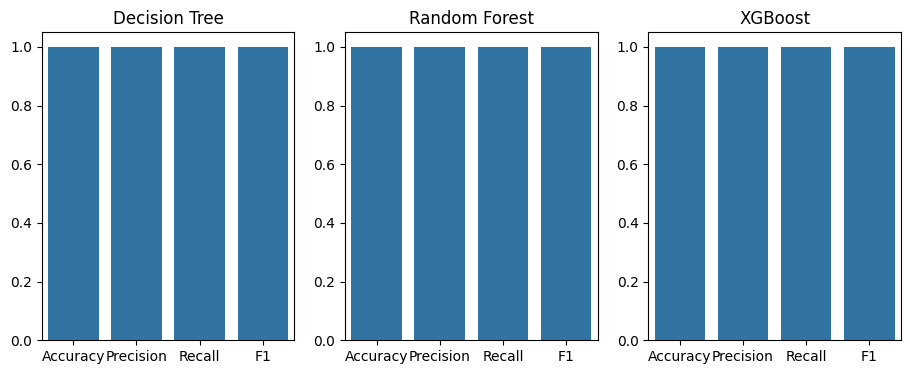

In [21]:
# make a bar plot showing each of the matrix with respect to the model
plt.figure(figsize=(15, 4))
plt.subplot(1, 4, 1)
sns.barplot(x=['Accuracy', 'Precision', 'Recall', 'F1'], y=[accuracy_score(y_test, y_pred), precision_score(y_test, y_pred, average='micro'), recall_score(y_test, y_pred, average='micro'), f1_score(y_test, y_pred, average='micro')])
plt.title('Decision Tree')
plt.subplot(1, 4, 2)
sns.barplot(x=['Accuracy', 'Precision', 'Recall', 'F1'], y=[accuracy_score(y_test, y_pred), precision_score(y_test, y_pred, average='micro'), recall_score(y_test, y_pred, average='micro'), f1_score(y_test, y_pred, average='micro')])
plt.title('Random Forest')
plt.subplot(1, 4, 3)
sns.barplot(x=['Accuracy', 'Precision', 'Recall', 'F1'], y=[accuracy_score(y_test, y_pred), precision_score(y_test, y_pred, average='micro'), recall_score(y_test, y_pred, average='micro'), f1_score(y_test, y_pred, average='micro')])
plt.title('XGBoost')
# plt.tight_layout()
plt.show()

# Working on Diamonds Dataset

In [25]:
df = sns.load_dataset('diamonds')
df.head()

,carat,cut,color,clarity,depth,table,price,x,y,z
0,0.23,Ideal,E,SI2,61.5,55.0,326,3.95,3.98,2.43
1,0.21,Premium,E,SI1,59.8,61.0,326,3.89,3.84,2.31
2,0.23,Good,E,VS1,56.9,65.0,327,4.05,4.07,2.31
3,0.29,Premium,I,VS2,62.4,58.0,334,4.20,4.23,2.63
4,0.31,Good,J,SI2,63.3,58.0,335,4.34,4.35,2.75


In [27]:
df.shape

(53940, 10)

In [28]:
# Split the data into X and y
X = df.drop('cut', axis=1)
y = df['cut']

# Encode the input variables
le = LabelEncoder()
X['color'] = le.fit_transform(X['color'])
X['clarity'] = le.fit_transform(X['clarity'])

# encode the target variable
y = le.fit_transform(y)


# Split the data into train and test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [29]:
%%time
# Train the decision tree model
dt = DecisionTreeClassifier()
dt.fit(X_train, y_train)

# Predict the test data
y_pred = dt.predict(X_test)

print('Accuracy score:', accuracy_score(y_test, y_pred))
print('Precision score:', precision_score(y_test, y_pred, average='macro'))
print('Recall score:', recall_score(y_test, y_pred, average='macro'))
print('F1 score:', f1_score(y_test, y_pred, average='macro'))

Accuracy score: 0.7131998516870597
Precision score: 0.7168168905030449
Recall score: 0.7192825387054702
F1 score: 0.7179414141974656
CPU times: total: 1.31 s
Wall time: 2.15 s


In [30]:
%%time
# Train the random forest model
rf = RandomForestClassifier()
rf.fit(X_train, y_train)

# Predict the test data
y_pred = rf.predict(X_test)

print('Accuracy score:', accuracy_score(y_test, y_pred))
print('Precision score:', precision_score(y_test, y_pred, average='macro'))
print('Recall score:', recall_score(y_test, y_pred, average='macro'))
print('F1 score:', f1_score(y_test, y_pred, average='macro'))

Accuracy score: 0.7874490174267705
Precision score: 0.7952840693999418
Recall score: 0.7772388846034299
F1 score: 0.7834166676260731
CPU times: total: 31.5 s
Wall time: 42.7 s


In [31]:
%%time
# Train the XGBoost model
xgb = XGBClassifier()
xgb.fit(X_train, y_train)

# Predict the test data
y_pred = xgb.predict(X_test)

print('Accuracy score:', accuracy_score(y_test, y_pred))
print('Precision score:', precision_score(y_test, y_pred, average='macro'))
print('Recall score:', recall_score(y_test, y_pred, average='macro'))
print('F1 score:', f1_score(y_test, y_pred, average='macro'))

Accuracy score: 0.8056173526140156
Precision score: 0.816426037421739
Recall score: 0.7929030247334078
F1 score: 0.8028675486282101
CPU times: total: 12 s
Wall time: 5.12 s


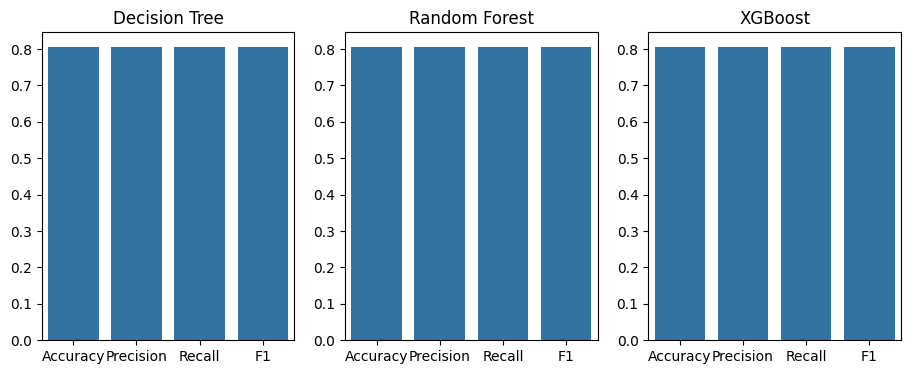

In [32]:
# make a bar plot showing each of the matrix with respect to the model
plt.figure(figsize=(15, 4))
plt.subplot(1, 4, 1)
sns.barplot(x=['Accuracy', 'Precision', 'Recall', 'F1'], y=[accuracy_score(y_test, y_pred), precision_score(y_test, y_pred, average='micro'), recall_score(y_test, y_pred, average='micro'), f1_score(y_test, y_pred, average='micro')])
plt.title('Decision Tree')
plt.subplot(1, 4, 2)
sns.barplot(x=['Accuracy', 'Precision', 'Recall', 'F1'], y=[accuracy_score(y_test, y_pred), precision_score(y_test, y_pred, average='micro'), recall_score(y_test, y_pred, average='micro'), f1_score(y_test, y_pred, average='micro')])
plt.title('Random Forest')
plt.subplot(1, 4, 3)
sns.barplot(x=['Accuracy', 'Precision', 'Recall', 'F1'], y=[accuracy_score(y_test, y_pred), precision_score(y_test, y_pred, average='micro'), recall_score(y_test, y_pred, average='micro'), f1_score(y_test, y_pred, average='micro')])
plt.title('XGBoost')
# plt.tight_layout()
plt.show()